# <span style='color:red'>Problem Set 2: Working with Financial Data</span>

## Instructions:

- **Make a copy of this notebook somewhere under the root-folder *except* for the shared-folder**
  - In JHub we have read-only access to the material under /shared
  - Everything else is associated with your Dartmouth ID and so only you can see them and they are permanent
- Enter the answers on this notebook
  - In most cases, you just need to execute the code and leave the output as it is
- All of the code needed here can be found in Topic1_PythonBasics 
- In some cases, I ask you to explain something. In the cases, there is an extra markup cell (**ANSWER:**) that you can fill out 
- When you are done, select "Print..." from the File-menu and create an **HTML** version of the notebook
  - Submit this notebook through canvas
  - Please don't submit it as a notebook (.ipynb) file

# Problem 1: Magnificent Seven

### a) Download daily data from Yahoo finance for the "magnificent seven" stocks for 2024:

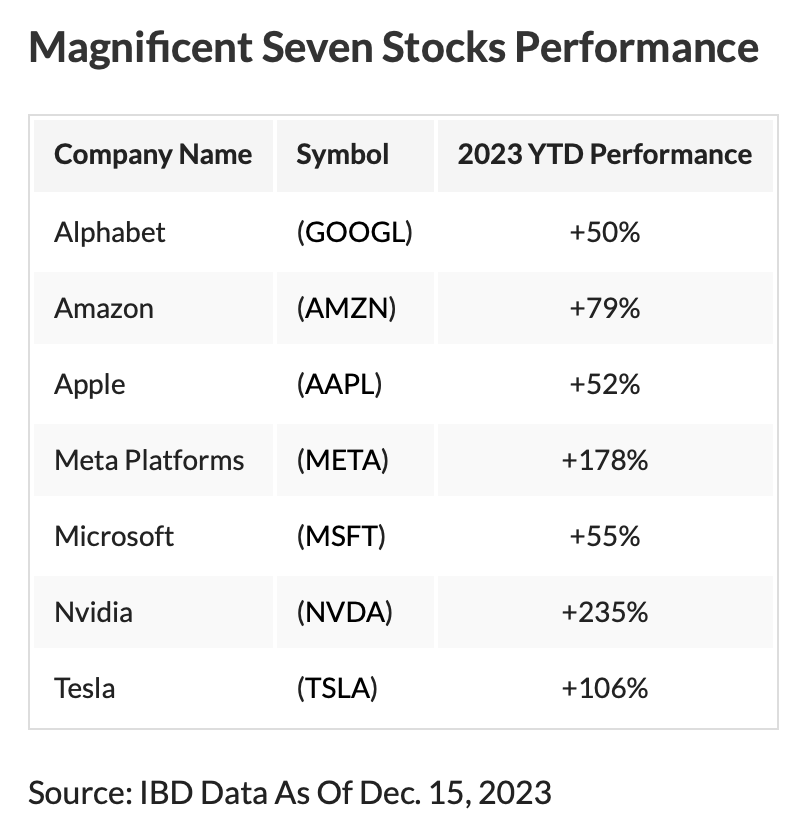

**Compute and report the average daily returns for these stocks in 2024**

Hint: if you do 

```from datetime import datetime```

you can set the start and end dates by writing

```
start_date = datetime(2023,12,30)
end_date = datetime(2024,12,31)
```
If you compute *returns* from the data that you get, it'll exactly cover 2024

### b) What was the *median* number of shares traded -- that is, median volume -- in 2024 for these seven stocks?

Hints: 
- You have the Yahoo finance data
- Instead of picking the "Adj Close" information with .xs(), pick "Volume"
- If the resulting dataframe is called, say, df, you can compute medians by writing ```df.median()```

### c) Create a new column "magnificent" that is the return on a portfolio that invests an equal amount into each stock and rebalances daily 

Report the average daily return for this "magnificent" portfolio.

Hint: If you have a dataframe with the returns, this is *really* simple. Just like Topic2, you just need to write something like

```df['index'] = df.mean(axis=1)```

and you're done. This *is* the return on an equal-weighted portfolio of the seven socks.

### d) Compute and plot the cumulative sum of returns for the "magnificent" portfolio

Hints:
- To compute the cumulative sum of returns, you can just write something like ```df['column'].cumsum()``` and you're done
- You can then follow that with some plot() command

### e) Compute and report the annualized Sharpe ratio for this portfolio in 2024

Assume that the risk-free rate in 2024 was 2% per year

Note: We typically assume that there are 252 trading days per year and so use ```252``` as the annualization factor

# Problem 2: Short-Term Reversals

In ```Topic3_CRSP_and_Reversals.ipynb``` notebook we construct a "linear" strategy that traded short-term reversals

When we analyzed this strategy's returns up to December 1995, we found that it earned a Sharpe ratio of 1.70.
- Note: This is before transaction costs. A strategy such as this has very high turnover and would therefore be very expensive to trade as-is

I want you to modify this strategy just a little bit.

- In the current implementation, we take positions on almost every stock
  - We short stocks with positive returns this month and are long those with negative returns
- In the code we generate the -1 to +1 positions on this line:

```

df['position'] = (
    df.groupby(level='date')['ret']  # Group by the 'date' level in the index
    .transform(lambda x: (x.rank(pct=True) - 0.5) * -2)  # Apply percentile rank transformation
)
```

- I want to change this code so that we invest only in assets that have gone up or down substantially, say, ones that belong to the top or bottom deciles
- You can do this by adding just one more line to the code right after we've defined the ```position``` column:

```
df['position'] = df['position'].apply(lambda x: x if np.abs(x) >= 0.9 else 0)
```

- There would be many different ways of doing this one, but ```apply``` is a convenient way of transforming data
  - When you call ```apply()```, you're asking Pandas to do something with each value (in this case)
  - I'm doing a simple lambda function that is not much of a function: it turns the value x itself if |x| >= 0.9 and 0 otherwise
    - The syntax might look a bit weird -- if/else expression of this "short" form are call ternary expressions
    
- Modify the code like this and then run the code up to the point where we compute the strategy's Sharpe ratio

**What is the Sharpe ratio of this modified strategy over the same sample period?**